In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Load a file by ID and create local file.
downloaded = drive.CreateFile({'id':'1os1T4eWQfmGNkCI8z4Fx3lJ39dWcsG4l'}) # replace fileid with Id of file you want to access
downloaded.GetContentFile('data\train.csv') # now you can use train.csv 
downloaded = drive.CreateFile({'id':'1fYwpjp6hsbvmvqagCCpa63Iqoil-Dgzq'}) # replace fileid with Id of file you want to access
downloaded.GetContentFile('data\test.csv') # now you can use train.csv 
downloaded = drive.CreateFile({'id':'1h32uyq4j5dU5xiHKT3V7VvF4EPNACuVD'}) # replace fileid with Id of file you want to access
downloaded.GetContentFile('data\sample_submission.csv') # now you can use train.csv 


In [159]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from __future__ import print_function
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re

print("Read and Segregate the data ")
toxictrain = pd.read_csv('data\train.csv')
toxictest = pd.read_csv('data\test.csv')
toxictrain.head()
train_toxic = toxictrain.drop(['id', 'comment_text'],axis=1)
count = []
category = list(train_toxic.columns.values)
for i in category:
  count.append((i,train_toxic[i].sum()))
train_stats = pd.DataFrame(count,columns=['category','no_of_comments'])
train_stats

Read and Segregate the data 


,category,no_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Plot the data categorywise


Text(0.5,0,'category')

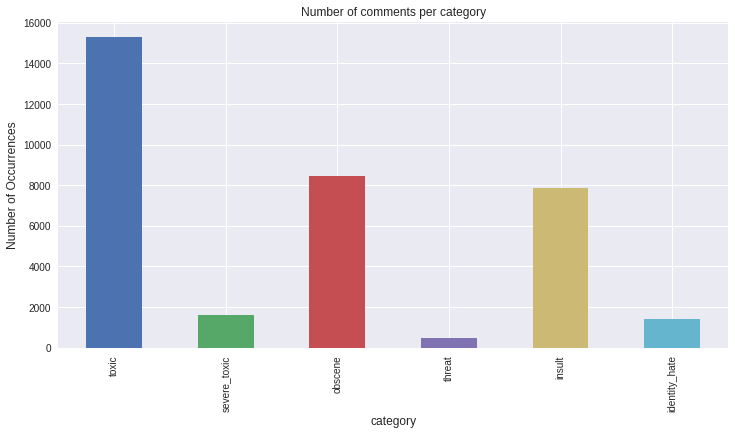

In [160]:
#number of comments category wise
print("Plot the data categorywise")
train_stats.plot(x='category', y='no_of_comments', kind='bar', legend=False, grid=True, figsize=(12, 6))
plt.title("Number of comments per category")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)


In [161]:
print("Finding mean, standard deviation and max from data")
lens = toxictrain.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

Finding mean, standard deviation and max from data


(394.0732213246768, 590.7202819048919, 5000)

Histogram plot for data


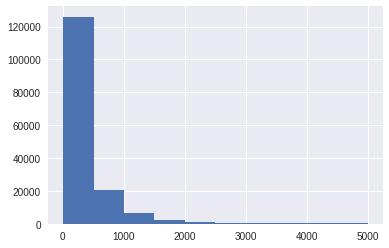

In [162]:
print("Histogram plot for data")
%matplotlib inline

lens.hist()

In [163]:
target = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxictrain['none'] = 1-toxictrain[target].max(axis=1)
toxictrain.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finding comments having multi labels


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0,'No of categories')

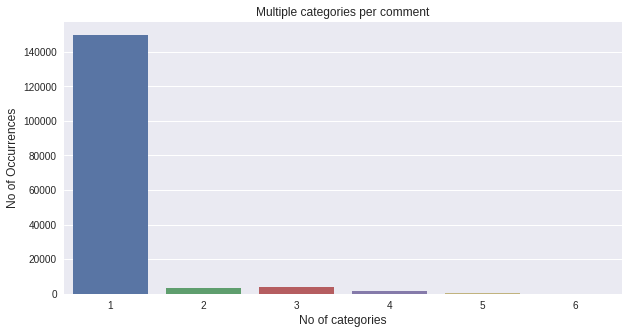

In [164]:
#comments have multi labels
print("Finding comments having multi labels")
rowsums = toxictrain.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('No of categories', fontsize=12)

Separate out comments on basis of category representing it with graph


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


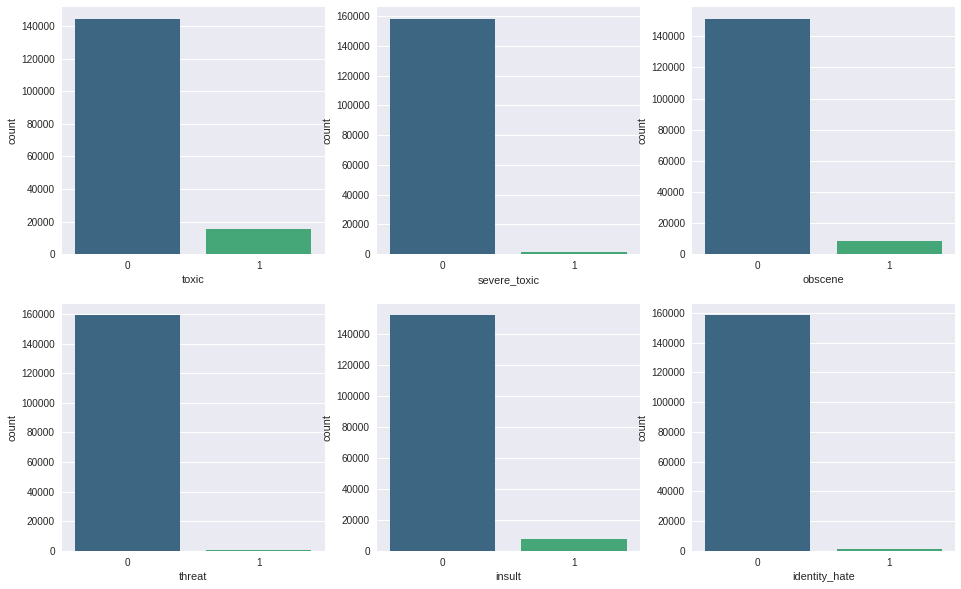

In [165]:
print("Separate out comments on basis of category representing it with graph")
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(toxictrain['toxic'],palette= 'viridis',ax=ax1)
sns.countplot(toxictrain['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(toxictrain['obscene'], palette= 'viridis',ax=ax3)
sns.countplot(toxictrain['threat'], palette= 'viridis',ax = ax4)
sns.countplot(toxictrain['insult'], palette = 'viridis',ax=ax5)
sns.countplot(toxictrain['identity_hate'], palette = 'viridis', ax = ax6)

In [166]:
print("Finding the base level accuracy for each label from data")
"test.fillna('missing',inplace=True)"

#base level accuracy for each label from above

base_accuracy = []
print("Base Level Accuracy for Each Label")
for i in target:
    base = ((toxictrain[i] == 0).sum()/len(toxictrain[i]))*100
    print(i+':' ,format(base))
    base_accuracy.append(base)
print(base_accuracy)

Finding the base level accuracy for each label from data
Base Level Accuracy for Each Label
toxic: 90.41555169799024
severe_toxic: 99.00044494300343
obscene: 94.7051782592075
threat: 99.70044682304429
insult: 95.06363938309592
identity_hate: 99.11951419744189
[90.41555169799024, 99.00044494300343, 94.7051782592075, 99.70044682304429, 95.06363938309592, 99.11951419744189]


In [168]:
#To check for UnLabelled text
print("Finding comments from data which are not labelled at all!!")
print('Percentage of comments that are not labelled:')
print(len(toxictrain[(toxictrain['toxic']==0) & (toxictrain['severe_toxic']==0) & (toxictrain['obscene']==0) & (toxictrain['threat']== 0) & (toxictrain['insult']==0) & (toxictrain['identity_hate']==0)]) / len(toxictrain)*100)
print('Number of missing comments in comment_text:')
toxictrain['comment_text'].isnull().sum()

Finding comments from data which are not labelled at all!!
Percentage of comments that are not labelled:
89.83211235124176
Number of missing comments in comment_text:


0

In [169]:
#TEXT PREPROCESSING OF DATA
print("Preprocessing and cleaning the data making them in lowercase")
def preprocess_clean_text(string):
  string = re.sub(r"\'d"," good ", string)
  string = re.sub(r"\'d"," best ", string)
  string = re.sub(r"\'d"," you ", string)
  string = re.sub(r"\'d"," Hello ", string)
  string = re.sub(r"\'d"," Hi ", string)
  string = re.sub(r"what's", "what is", string)
  string = re.sub(r"\'s", " ", string)
  string = re.sub(r"\'ve"," have " , string)
  string = re.sub(r"can't", "cannot ", string)
  string = re.sub(r"n't", " not ", string)
  string = re.sub(r"i'm","i am", string)
  string = re.sub(r"\'re"," are ", string)
  string = re.sub(r"\'d"," would ", string)
  string = re.sub(r"\'d"," should ", string)
  string = re.sub(r"\'d"," was ", string)
  string = re.sub(r"\'ll'"," will ", string)
  string = re.sub(r"\'scuse", " excuse ", string)
  string = re.sub('\W', ' ', string)
  string = re.sub('\s+', ' ', string)
  string = string.strip(' ')
  return string

# clean the comment_text in train
cleaned_train = []
for i in range(0,len(toxictrain)):
  cleaned_comment = preprocess_clean_text(toxictrain['comment_text'][i])
  cleaned_train.append(cleaned_comment)
toxictrain['comment_text'] = pd.Series(cleaned_train).astype(str)

Preprocessing and cleaning the data making them in lowercase


In [171]:
print("Example of train data in lower case form")
toxictrain['comment_text'] = toxictrain['comment_text'].map(lambda com : preprocess_clean_text(com.lower()))
toxictrain['comment_text'][0]

Example of train data in lower case form


'explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i m retired now 89 205 38 27'

In [172]:
print("Example of Test data in lower case form")
toxictest['comment_text'] = toxictest['comment_text'].map(lambda com : preprocess_clean_text(com.lower()))
toxictest['comment_text'][0]

Example of Test data in lower case form


'yo bitch ja rule is more succesful then you ll ever be whats up with you and hating you sad mofuckas i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on him and nothin is wrong bein like tupac he was a brother too fuckin white boys get things right next time'

In [173]:
#Test set
print("Preprocessing test data")
cleaned_test_comment = []
for i in range(0,len(toxictest)):
  cleaned_comment = preprocess_clean_text(toxictest['comment_text'][i])
  cleaned_test_comment.append(cleaned_comment)
toxictest['comment_text'] = pd.Series(cleaned_test_comment).astype(str)

Preprocessing test data


In [174]:
print("Vectorizing")
X=toxictrain.comment_text
text_X=toxictest.comment_text

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectors = TfidfVectorizer(max_features=40000,stop_words='english')
vectors

Vectorizing


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=40000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [175]:

X_train=toxictrain.comment_text
# learn the vocabulary in the training data, then use it to create a document-term matrix
X_docmat = vectors.fit_transform(X_train)
# examine the document-term matrix created from X_train
X_docmat

<159571x40000 sparse matrix of type '<class 'numpy.float64'>'
	with 3824615 stored elements in Compressed Sparse Row format>

In [176]:
X_test=toxictest.comment_text
# learn the vocabulary in the testing data, then use it to create a document-term matrix
X_test_docmat = vectors.fit_transform(X_test)
# examine the document-term matrix created from X_test
X_test_docmat


<153164x40000 sparse matrix of type '<class 'numpy.float64'>'
	with 3224863 stored elements in Compressed Sparse Row format>

In [177]:
print("Train the model with Logistic regression")
#Lets train the data with Logistic regression
#import and instantiate the Logistic Regression model
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logregress = LogisticRegression(C=12.0,solver='sag')

change_accuracy = []
for i,label in enumerate(target):
    print('Processing {}'.format(label))
    print(label+" is: ",base_accuracy[i])
    Y = toxictrain[label]
    
    # train the model using X_docmat & y
    logregress.fit(X_docmat, Y)
    # compute the training accuracy
    Y_predict_X = logregress.predict(X_docmat)
    print('Training accuracy is         {}'.format(accuracy_score(Y, Y_predict_X)*100))
    print("Increase from Base accuracy is {}".format(accuracy_score(Y, Y_predict_X)*100 - base_accuracy[i]))
    change_accuracy.append(accuracy_score(Y, Y_predict_X)*100 - base_accuracy[i])
    print("")
    # compute the predicted probabilities for X_test_dtm
    test_Y_prob = logregress.predict_proba(X_test_docmat)[:,1]

Train the model with Logistic regression
Processing toxic
toxic is:  90.41555169799024
Training accuracy is         97.91127460503475
Increase from Base accuracy is 7.4957229070445095

Processing severe_toxic
severe_toxic is:  99.00044494300343
Training accuracy is         99.41154721095938
Increase from Base accuracy is 0.41110226795595395

Processing obscene
obscene is:  94.7051782592075
Training accuracy is         98.99104473870565
Increase from Base accuracy is 4.285866479498154

Processing threat
threat is:  99.70044682304429
Training accuracy is         99.87341058212333
Increase from Base accuracy is 0.17296375907903894

Processing insult
insult is:  95.06363938309592
Training accuracy is         98.46400661774382
Increase from Base accuracy is 3.400367234647902

Processing identity_hate
identity_hate is:  99.11951419744189
Training accuracy is         99.60268469834745
Increase from Base accuracy is 0.48317050090555824



Plotting the change happen after training the data


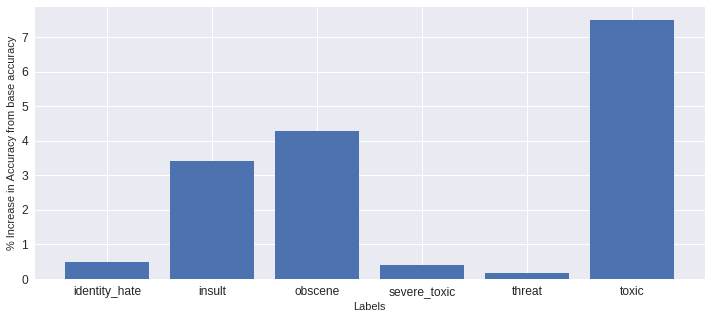

In [178]:
print("Plotting the change happen after training the data")
plt.bar(target,change_accuracy)
plt.ylabel("% Increase in Accuracy from base accuracy")
plt.xlabel("Labels")
plt.gcf().set_size_inches(12,5)
plt.tick_params(labelsize=12)
plt.show()

In [179]:

train_pipe, test_pipe = train_test_split(toxictrain, random_state=42, test_size=0.33,shuffle=True)
X_test = test_pipe.comment_text
X_train = train_pipe.comment_text
print(X_train.shape,X_test.shape)

(106912,) (52659,)


In [180]:
print("Training the model using pipeline to accurately fit the test data using stopwords")
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))



#Pipeline way for Logistic regression to enhance the data
logregress_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

for category in target:
    print('Processing {}'.format(category))
    
    # train the model using X_docmat & y
    logregress_pipeline.fit(X_train, train_pipe[category])
    
    # compute the testing accuracy
    prediction = logregress_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test_pipe[category], prediction)))

Training the model using pipeline to accurately fit the test data using stopwords
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Processing toxic
Test accuracy is 0.9549174879887579
Processing severe_toxic
Test accuracy is 0.9910556600011394
Processing obscene
Test accuracy is 0.9761864068820145
Processing threat
Test accuracy is 0.9973793653506523
Processing insult
Test accuracy is 0.9687043050570653
Processing identity_hate
Test accuracy is 0.991758293928863
